In [44]:
%matplotlib inline
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt

In [45]:
fibo.fib(10)

1 1 2 3 5 8 


In [46]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    RANDOM = 3

In [53]:
seed()

def play_game(strategie):
    portes = [0,1,2]
    
    bonne_porte = randint(0,2)
    
    #choix du joueur
    premier_choix = randint(0,2)
    
    #il reste 2 portes
    portes.remove(premier_choix)
    
    #Le presentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    elif strategie == Strategie.RANDOM:
        deuxieme_choix = np.random.choice([portes[0],premier_choix])
    else:
        raise ValueError('Stratégie non reconnue!')
    
    return deuxieme_choix == bonne_porte

In [54]:
play_game(Strategie.CHANGER)

True

In [55]:
def play(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [56]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

print("En random son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.RANDOM, 10000))))

En changeant de porte, le joueur a gagné 6649 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3329 sur 10000 parties.
En random son choix initial, le joueur a gagné 4976 sur 10000 parties.


<BarContainer object of 3 artists>

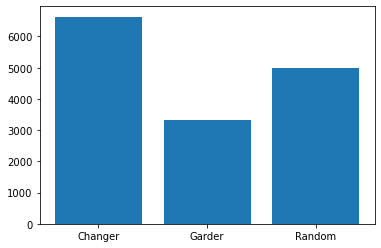

In [59]:
plt.figure()
plt.bar([1,2,3],[sum(play(Strategie.CHANGER,10000)),
               sum(play(Strategie.GARDER,10000)),
              sum(play(Strategie.RANDOM,10000))],
       tick_label=['Changer', 'Garder', 'Random'])

In [61]:
gains_changer = []
gains_garder = []
gains_random = []

samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    gains_random.append(play(Strategie.RANDOM, tours))

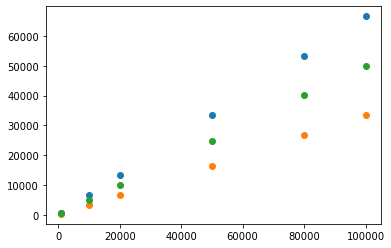

In [62]:
plt.figure()
plt.scatter(samples, [sum(x) for x in gains_changer])
plt.scatter(samples, [sum(x) for x in gains_garder])
plt.scatter(samples, [sum(x) for x in gains_random])

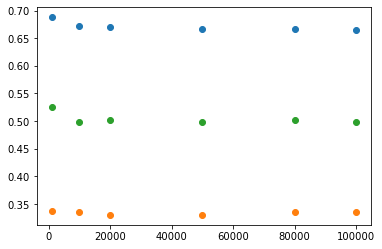

In [63]:
plt.figure()
plt.scatter(samples, [sum(gains_changer[i])/samples[i] for i in range(len(samples))])
plt.scatter(samples, [sum(gains_garder[i])/samples[i] for i in range(len(samples))])
plt.scatter(samples, [sum(gains_random[i])/samples[i] for i in range(len(samples))])